기존의 simple rnn모델

장기 의존성 문제는 입력데이터가 많아 질수록 Simple RNN층, 즉 은닉 층세거 보관하는 과거의 정보가 마지막 층까지 충분히 전달되지 못하는 현상을 의미함

그 이유는 활성화 함수 tanh 함수의 출력값의 범위는 -1에서 1사이인데 1보다 작은수를 곱할 수 록 더 작아지기 때문입니다.



LSTM과 GRU 셀

LSTM셀(long short term memory) : 순환셀이 4개가 더 들어있다 + 은닉상태뿐만 아니라 셀상태도 만들고 이는 LSTM셀의 출력을 사용되는 것이 아닌 셀 자체내에서 순환되는 상태값

1.은닉상태 h를 출력하지만 h는  다음 타임스텝에서 다시 셀에 주입된다.




LSTM층은 셀상태라는 변수가 추가적으로 공유되는 특징이 있습니다 -> LSTM의 셀 상태가 다음 층으로 전달되면서 기존의 상태를 보존하므로 장기의존성 문제를 해결할 수 있습니다. 

LSTM의 핵심은 이전 단계 정보를 메모리셀에 저장하여 다음 단계로 전달하는 것 입니다. 즉, LSTM은 현재 시점의 정보를 바탕으로 과거 내용을 얼마나 잊을지 또는 기억할지 등을 계산하고, 그 결과에 현재 정보를 추가해서 다음 시점으로 정보를 전달합니다.

LSTM셀 : 메모리셀과 은닉층셀 존재

잊는 메커니즘(forget gate) : 과거의 정보를 얼마나 잊을지(기억할지)결정하는 게이트이며, 현 시점의 데이터 와 과거의 은닉층 값을 각각 가중치에 맞게 곱한후 그 2개의 값을 더하고 시그모이드 함수에 적용하는 과정입니다. 여기서 만일 시그모이드 함수의 값이 1에 가깝다면 과거의 정보를 많이 활용한다는 의미이고, 시그모이드값이 0에 가깝다면 과거의 정보를 많이 잃게 되는 원리입니다. 그 후 이 값과 이전의 메모리 셀에서의 값을 곱하게 됩니다.

새로운 정보 추가 방법(input gate) : 입력값과 이전의 은닉층값에 각각의 가중치를 곱하고 이를 더한결과를 시그모이드 함수에 적용합니다. 또한 입력값과 이전 은닉층값에 각각 서로 다른 가중치를 또 곱한후 활성화 함수 tanh함수를 적용하여 현재 시점의 새로운 정보를 생성합니다. 즉 시그모이드함수, 활성화 함수 tanh의 값을 곱한후 이전의 메모리셀에 있던 값을 더합니다. -> 즉, 과거의 정보를 forget gate에서 계산됨 만큼 잊고 현 시점의 정보값에 입력 게이트의 중요도만큼 곱해준 것을 더해서 현재 시점기준의 memory cell값을 계산합니다.

출력의 경우(output gate) : 입력값이 은닉층셀에서 시그모이드함수를 통해 메모리 셀에서 출력값이 tanh활성화 함수를 통해 서로 곱해짐 이 값이 출력이 되고 가중치와 절편은 은닉층셀에 존재 그 후 다음 은닉층 셀로 이동

GRU: LSTM과 구조는 비슷하지만 더 간단한 구조 ->연산량 감소 + 계산상 이점이 있다

LSTM 구조의 cell state의 역할-> GRU 계층 출력 값 H 수행

LSTM 구조의 활성화 함수 시그모이드 3개, tanh함수 2개(5개) -> GRU 구조의 활성화 함수 시그모이드 2개 tanh함수 1개(3개) -> 연산량 감소



GRU의 reset gate : 과거의 정보를 얼마나 잊을지(기억할지) 결정

입력데이터와 과거의 은닉층 값에 각각의 가중치를 곱하고 더한 값을 시그모이드 함수 적용





GRU의 update gate : LSTM의 input, forget gate를 합쳐놓은 개념이라고 볼수 있다. 이는 과거와 현재의 정보가운데 어떤 정보를 더 많이 업데이트 할지를 결정하는 게이트 이다. 현재의 값에 가중치를 곱한후 시그모이드 함수를 적용한후 가져가야할 양의 데이터와 버릴양의 데이터를 구분한다

GRU의 Candidate(데이터 선정) : 과거의 출력값과 입력값을 시그모이드 함수 적용한 값과의 완전연결상태에서 곱 연산을 한 후, 입력값과의 tanh함수를 통해 새로운 데이터를 선정

GRU의 Output : 현재 시점의 데이터중 얼마나 챙길것인지, 얼마나 잊을것인지를 결정하는 부분입니다. 데이터 선정단계에서 챙겨갈 데이터값 + 챙기지 않을 데이터값 곱하기 이전의 출력값을 해주면 최종 GRU층의 출력값이 된다

LSTM 신경망 훈련하기

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)
#500의 단어만 사용

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)
#검증데이터 생성

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
#시퀸스 패딩: 모델훈련시 사용하는 단어의 길이를 통일시켜중
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)
#단어의 개수가 100보다 작으면 0으로 채우고 100보다 크면 잘라냄(앞에서부터)

LSTM 신경망

In [ ]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
#500개어휘사전, 16개 출력차원, 토큰의 수 100개
model.add(keras.layers.LSTM(8))
#LSTM의 뉴런의 개수 8개
model.add(keras.layers.Dense(1, activation='sigmoid'))
#이진분류(시그모이드 함수)

model.summary()
#LSTM()가중치: (16X8 + 8X8 + 8)X4

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
#학습률 : 0.0001
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])
#옵티마이저: rmsprop, 손실값: 이진분류->'binary_crossentropy', 정확도 추가
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
#콜백
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
#patience 3번, 최고값 저장
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])
#반복: 100, 미니배치크기:64, 검증세트, 체크포인트와 조기종료 추가
#훈련세트에서의 정확도: 0.82 검증세트에서의 정확도: 0.80

Epoch 1/100
313/313 [==============================] - 15s 40ms/step - loss: 0.6923 - accuracy: 0.5471 - val_loss: 0.6913 - val_accuracy: 0.5994
Epoch 2/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6896 - accuracy: 0.6163 - val_loss: 0.6873 - val_accuracy: 0.6384
Epoch 3/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6804 - accuracy: 0.6536 - val_loss: 0.6656 - val_accuracy: 0.6746
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6326 - accuracy: 0.7070 - val_loss: 0.6062 - val_accuracy: 0.7222
Epoch 5/100
313/313 [==============================] - 12s 37ms/step - loss: 0.5971 - accuracy: 0.7234 - val_loss: 0.5860 - val_accuracy: 0.7356
Epoch 6/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5757 - accuracy: 0.7419 - val_loss: 0.5703 - val_accuracy: 0.7426
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5570 - accuracy: 0.7534 - val_loss: 0.5521 - val_ac

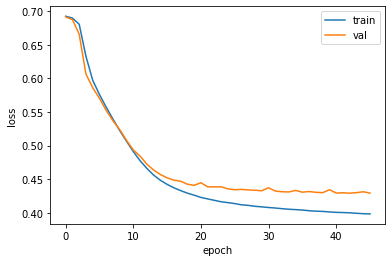

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#simple_rnn보다 검증세트에서의 loss값이 감소함
#뿐만 아니라 훈련세트와 검증세트의 loss값 차이가 줄어듬

순환 층에 드롭아웃 적용하기

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
#은닉상태에 드롭아웃 비율을 지정 30%끔
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 45ms/step - loss: 0.6928 - accuracy: 0.5367 - val_loss: 0.6924 - val_accuracy: 0.5802
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6919 - accuracy: 0.5862 - val_loss: 0.6910 - val_accuracy: 0.6132
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6891 - accuracy: 0.6291 - val_loss: 0.6865 - val_accuracy: 0.6522
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6769 - accuracy: 0.6684 - val_loss: 0.6597 - val_accuracy: 0.6728
Epoch 5/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6297 - accuracy: 0.6983 - val_loss: 0.6134 - val_accuracy: 0.7068
Epoch 6/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6024 - accuracy: 0.7120 - val_loss: 0.5986 - val_accuracy: 0.7100
Epoch 7/100
313/313 [==============================] - 12s 40ms/step - loss: 0.5864 - accuracy: 0.7236 - val_loss: 0.5810 - val_ac

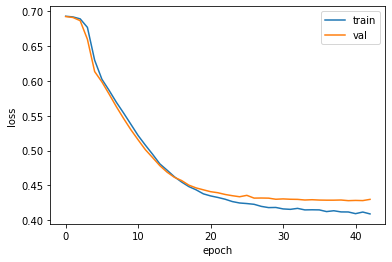

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#드롭아웃추가시 훈련세트와 검증세트의 차이도 줄고 성능이 좋아짐

2개의 층을 연결하기

In [ ]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
#return_sequences=True을 지정해야 됨->각 타임스텝의 은닉층에서 은닉상태를 출력해주어야 함
model3.add(keras.layers.LSTM(8, dropout=0.3))
#마지막 순환층
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])
#2개의 층을 연결했기 때문에 시간이 많이 걸리는 듯

Epoch 1/100
313/313 [==============================] - 29s 80ms/step - loss: 0.6927 - accuracy: 0.5363 - val_loss: 0.6924 - val_accuracy: 0.5144
Epoch 2/100
313/313 [==============================] - 24s 78ms/step - loss: 0.6901 - accuracy: 0.5463 - val_loss: 0.6868 - val_accuracy: 0.5350
Epoch 3/100
313/313 [==============================] - 24s 77ms/step - loss: 0.6591 - accuracy: 0.5886 - val_loss: 0.6311 - val_accuracy: 0.7002
Epoch 4/100
313/313 [==============================] - 24s 76ms/step - loss: 0.6105 - accuracy: 0.7168 - val_loss: 0.6103 - val_accuracy: 0.7088
Epoch 5/100
313/313 [==============================] - 23s 75ms/step - loss: 0.5843 - accuracy: 0.7363 - val_loss: 0.5753 - val_accuracy: 0.7476
Epoch 6/100
313/313 [==============================] - 24s 76ms/step - loss: 0.5592 - accuracy: 0.7509 - val_loss: 0.5523 - val_accuracy: 0.7408
Epoch 7/100
313/313 [==============================] - 24s 77ms/step - loss: 0.5405 - accuracy: 0.7520 - val_loss: 0.5282 - val_ac

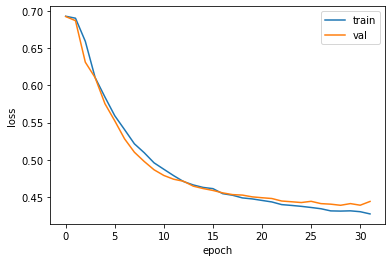

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#성능 굿
#2개의 층 + 드롭아웃

GRU 신경망 훈련하기

GRU셀 : 셀상태 X + 

In [ ]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()
#GRU 가중치: (16X8 + 8X8 +8 +8)X3

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])
#GRU층으로서 연산이 LSTM보다 간단해졌는데 생각보다 시간차이가 크지가 않네....

Epoch 1/100
313/313 [==============================] - 16s 44ms/step - loss: 0.6920 - accuracy: 0.5355 - val_loss: 0.6911 - val_accuracy: 0.5516
Epoch 2/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6890 - accuracy: 0.5892 - val_loss: 0.6879 - val_accuracy: 0.5986
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6843 - accuracy: 0.6137 - val_loss: 0.6822 - val_accuracy: 0.6174
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6764 - accuracy: 0.6320 - val_loss: 0.6729 - val_accuracy: 0.6290
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6632 - accuracy: 0.6460 - val_loss: 0.6569 - val_accuracy: 0.6472
Epoch 6/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6402 - accuracy: 0.6676 - val_loss: 0.6285 - val_accuracy: 0.6726
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5959 - accuracy: 0.6989 - val_loss: 0.5688 - val_ac

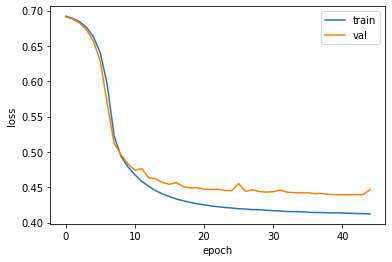

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#계산간단, 메모리상 LSTM보다 좋음

마무리

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')
# 텐서플로 2.3에서는 버그(https://github.com/tensorflow/tensorflow/issues/42890) 때문에 compile() 메서드를 호출해야 합니다.
# rnn_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

rnn_model.evaluate(test_seq, test_target)
#LSTM 2개 연결 + 드롭아웃

782/782 [==============================] - 11s 13ms/step - loss: 0.4379 - accuracy: 0.7942


[0.4378754198551178, 0.7942399978637695]